### **1. Data Collection**

In [15]:
#import essential library to load dataset
import pandas as pd
#importing the dataset
train_dataset = pd.read_csv('./dataset/train_salary.csv')
test_dataset = pd.read_csv('./dataset/test_salary.csv')
#copy of training dataset excluding the last column
train_input = train_dataset.iloc[:, :-1].values
#copy of last column from training dataset
train_output = train_dataset.iloc[:, -1].values
#copy of testing dataset excluding the last column
test_input = test_dataset.iloc[:, :-1].values
#copy of last column from testing dataset
test_output = test_dataset.iloc[:, -1].values

### **2. Model/hypothesis represenation**

In [16]:
def hypothesis(sample, parameter):
    pred_output = parameter[0] #calculate theta0*x0 (x0 value is 1)
    for n in range(len(sample)):#calculate the number of features
        pred_output += parameter[n+1] * float((sample[n])) #calculate theta1*x1 + theta2*x2 .. . .thetan*xn
    return pred_output

### **3. Cost function**

In [17]:
def cost(pred_output,actual_output,m):
  error = (pred_output - float(actual_output))
  mse_error = (1/2*m) * (error**2) #m value is 1 since it is stochastic gradient optimization
  return error,mse_error #error value is for parameter updation and mse_error is to measure the average error at every epoch

### **4. Optimization of model parameters**

In [18]:
def gradient_descent(error,parameters,learning_rate,sample):
  parameters[0] = parameters[0] - (learning_rate * error) #update theta0
  for n in range(sample.size): #calculate the number of features
    parameters[n + 1] = parameters[n + 1] - (learning_rate * error * float(sample[n])) #update theta1, theta2, , ,, depending upon the number of features
  return parameters #return the updated paremeters

### **5. Stochastic gradient descent:**

In [19]:
def optimization(training_input,training_output,testing_input,testing_output,learning_rate,parameters,epochs,m):
  best_error = 99999999999
  for epoch in range(epochs):
    total_error = 0
    test_error = 0
    for sample, actutal_output in zip(training_input,training_output):#iterate through the training dataset
      predicted_output = hypothesis(sample,parameters) #calculate the per sample predicted output
      error,mse_error = cost(predicted_output,actutal_output,m) #calculate error for each training sample
      parameters = gradient_descent(error,parameters,learning_rate,sample) # update the model parameters
      total_error += mse_error #sumup the error from each training sample
    total_error = (total_error/len(train_input)) #average error
    train_error_list.append(total_error) #append the total error from every epoch to list
    #epochs_num.append(epoch+1)
    testing_error = test_model(testing_input,testing_output,parameters,m) #calculate the error for every testing sample
    test_error += testing_error #sumup the error from each testing sample
    test_error_list.append(test_error)#append the total error from every epoch to list
    if ((epoch+1)%2000==0):#print training progress after every 2000 epochs and replace 2000 by 1 to print progress after every epoch
      print("Epoch:",epoch+1, "Training error:",total_error, "Testing_error:",test_error, "Parameters:",parameters)
    if(best_error > test_error and test_error>=0.0): #copy the best parameter values along with epoch number and testing error for the least testing error during the training
      best_error=test_error
      best_epoch=epoch+1
      best_parameters=parameters
  return best_error,best_epoch,best_parameters

### **6. Model testing**

In [20]:
def test_model(testing_input,testing_output,parameters,m):
  total_error = 0
  for sample, actutal_output in zip(testing_input,testing_output):#iterate through the testing dataset
    predicted_output = hypothesis(sample,parameters)#calculate the per sample predicted output
    error,mse_error = cost(predicted_output,actutal_output,m)#calculate error for each testing sample
    total_error += mse_error #sumup the error from each testing sample
  total_error = (total_error/len(test_input))#average error
  return total_error

### **7. Model training**

In [21]:
epochs = 25000
learning_rate = 0.0005
m = 1 #batch_size=1 since its stochastic gradient descent algorithm
#calulate the number of features and initialize all the model parameters to 0
parameters = [0.0 for i in range( len(train_input[0])+1)]
#define the lists for graph plot
train_error_list = [ ]
test_error_list = [ ]
#start the learning algorithm
best_error,best_epoch,best_parameters = optimization(train_input,train_output,test_input,test_output,learning_rate,parameters,epochs,m)
print("\n\n\n-----------------------------------------------------Training Finished-----------------------------------------------------\n")
print("The Best testing error:",best_error,"is at epoch:", best_epoch,"with parameters values",best_parameters)
print("\n---------------------------------------------------------------------------------------------------------------------------")

Epoch: 2000 Training error: 0.6751715413266479 Testing_error: 1.183341917528965 Parameters: [-0.255538575759327, 9.485931764649, 6.078472111746896, 8.47518648378849]
Epoch: 4000 Training error: 0.6742278755388742 Testing_error: 1.1764871600965758 Parameters: [-0.38363349332072405, 9.489784692176048, 6.0786361313358785, 8.489563304720935]
Epoch: 6000 Training error: 0.6742003164773049 Testing_error: 1.175968080596902 Parameters: [-0.3936962887428751, 9.490087367896683, 6.078649016277748, 8.490692709467186]
Epoch: 8000 Training error: 0.6741984389235399 Testing_error: 1.1759274228907803 Parameters: [-0.3944867951394988, 9.490111145294827, 6.07865002848446, 8.490781432494813]
Epoch: 10000 Training error: 0.6741982932016067 Testing_error: 1.1759242296689814 Parameters: [-0.39454889521573566, 9.490113013183876, 6.0786501080007165, 8.490788402339469]
Epoch: 12000 Training error: 0.6741982817650337 Testing_error: 1.1759239788225648 Parameters: [-0.39455377363228045, 9.490113159920252, 6.07865

### **8. Graph plots to visualize the training and testing errors**

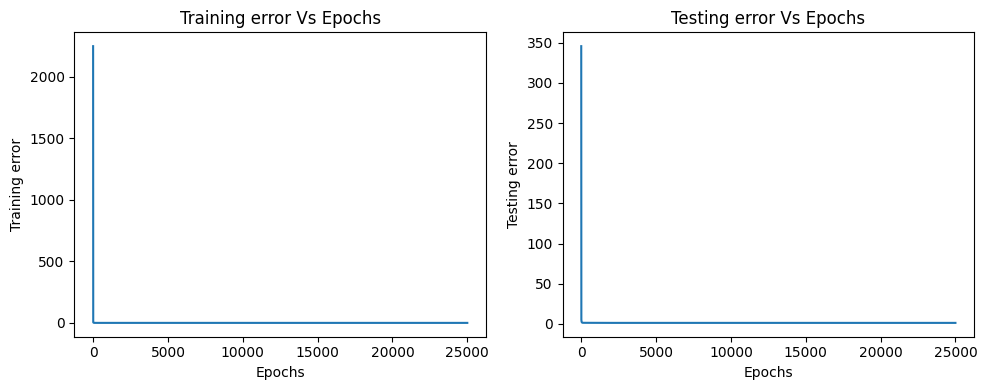

In [22]:
#import the library to plot the graph
import matplotlib.pyplot as plt
#copy the data for plotting
epochs_num = list(range(1, epochs+1))
x = epochs_num
y1 = train_error_list
y2 = test_error_list
#create a figure with subplots and specify figsize
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
#plot the first subplot for training and add legend and axis labels
axes[0].plot(x, y1)
axes[0].set_title('Training error Vs Epochs')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Training error')
#plot the second subplot for testing and add legend and axis labels
axes[1].plot(x, y2)
axes[1].set_title('Testing error Vs Epochs')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Testing error')
plt.tight_layout()
#show the plots
plt.show()

### **9. Linear Regresion with Scikit library**

In [23]:
#import the Linear Regression from sklearn
from sklearn.linear_model import LinearRegression
#import the mse loss function
from sklearn.metrics import mean_squared_error
#create linear regression object
model = LinearRegression()
#train the model using the training dataset
model.fit(train_input, train_output)
#make predictions on the testing data
y_pred = model.predict(test_input)
#calculate the Mean Squared Error on testing dataset
mse = mean_squared_error(test_output, y_pred)
print("The testing error is:", mse/2,"with intercept:", model.intercept_,"and coefficients:", model.coef_)

The testing error is: 1.2169218827800505 with intercept: -0.4080644275995269 and coefficients: [9.49049716 6.06819016 8.48657175]


### **10. Cross-check whether our cost calculation function has correctly predicted the error by substituting the optimized model parameters from our stochastic gradient descent algorithm into the scikit model**

In [24]:
#load the parameters with least testing error from our Stochastic Gradient Descent implementation
model.intercept_,model.coef_[0],model.coef_[1],model.coef_[2] = [-0.3945541895403048, 9.490113172430219, 6.0786501147799274, 8.490788996551608]
#make predictions on the testing data
y_pred = model.predict(test_input)
#calculate the Mean Squared Error on testing dataset
mse = mean_squared_error(test_output, y_pred)
print("The testing error is:", mse/2,"with intercept:", model.intercept_,"and coefficients:", model.coef_)

The testing error is: 1.1759239574367335 with intercept: -0.3945541895403048 and coefficients: [9.49011317 6.07865011 8.490789  ]
